# FilePro

Below section is used to import all modules required for this project

In [1]:
import hashlib                   #importing module for hashing using sha256
from os import walk              #importing os module
import time                      #importing time module
import csv                       #importing csv module
import os                        #importing os module
import pandas as pd              #importing pandas module
import numpy as np               #importing numpy module
import matplotlib.pyplot as plt  #importing pyplot from matplotlib

__Hashing function:__

Hashing function using sha256 - Secure Hash Algorithm 2 is 256-bit-long cryptographic hash function that produces a value which is used as key. 

In [2]:
def hashcode(path):                              #hashcode function with parameter as path 
    h = hashlib.sha256()                         #sha256 function from hashlib module
    with open(path, 'rb') as file:               #opening file in path 
        while True:                              #looping till break
            # We can read in smaller bits since reading is buffered.
            chunk = file.read(h.block_size)      #size of the input chunk is the block_size
            if not chunk:
                break
            h.update(chunk) #feeding with the chunk 

    return h.hexdigest()  

    '''Return the hash of the information that has been sent to the update() method so far. 
    digest is returned as a double-length string object that only contains hexadecimal digits.'''

__version_older_than_2days():__
Below function is used to check the file at a path is older than 2 days. This function returns boolean value.

In [3]:
def version_older_than_2days():
        cwd = os.getcwd()                         #fetching current working directory
        
        '''below conditon has multiple parts:
        time.time()  =  gives present time iin the system
        cwd+"/file_info.csv"  =  concates info file with cwd
        os.path.getmtime()  =  gives the date modified 
        left hand side of the condition gives the time difference between current time and the last time modified.
        on right hand side we are calculating 2 days in seconds 2 - days * 24 - hours * 60 - mins * 60 - sec
        comparing both sides if more than 2 days returning value True else False
        '''
        
        if (time.time() - os.path.getmtime(cwd+"/file_info.csv") > (2 * 24 * 60 * 60)):
            return True
        return False 

__types_of_files():__
Below function is used to find types of files 

In [4]:

def types_of_files():
        cwd = os.getcwd()                                 #fetching current working directory
        type_of_files = []                                #list to store types of files
        cnt_of_types ={}
        
        '''walk function of os module returns a tuple with 3 values which are:
        dirpath, dirnames, filenames of given directory.
        '''
        
        for (dirpath, dirnames, filenames) in walk(cwd):
            for i in range(len(filenames)):               #looping number of filenames times
                
                '''I am working on mscOS which creates .DS_Store file Desktop Services Store, 
                is an invisible file on the macOS operating system. Filtering that file with below condition.'''
                
                if filenames[i] != ".DS_Store":
                    fname,ext = filenames[i].split(".")   #splitting file name at "." left part is file name and right part is extension
                    type_of_files.append(ext)             #appending right part to the list
        
        uniq_items = set(type_of_files)
        temp_var = input("View line graph?\n Press y else n: ")#Asking whether user wants to view Bar graph
        if temp_var == "y":                               #If user gives y
            for i in uniq_items:                          #for all unique elements in the set, this block populates dict with keys as "i" and values as count in type_of_fileslist
                cnt_of_types[i] = type_of_files.count(i)

            plt.plot(cnt_of_types.keys(), cnt_of_types.values())#plotting line graph using plot() with keys and values on axes
            plt.title('No. of files Vs Type of file')     #Title of graph using title()
            plt.xlabel('Type of file')                    #X axis name for graph using xlabel()
            plt.ylabel('No. of files')                    #Y axis name for graph using ylabel()
            plt.show()                                    #Will display graph
        
        return uniq_items                                 # returning the unique elements of this list.

__Mean_n_median_type(ty):__ Mean and median size of the files by type. The parameter ty is type of file whose mean and median we are checking


In [5]:
def Mean_n_median_type(ty):
    df = pd.read_csv("file_info.csv")           #reading values from info csv file using pandas and making data freme.
    
    '''df['Extension'] == ty this filter will filter when extension is ty then take size in bytes.
    mean() - function is used to find mean
    median() - function is used to find median'''
    mean = df.loc[df['Extension'] == ty, 'Size in bytes'].mean()
    median = df.loc[df['Extension'] == ty, 'Size in bytes'].median()
    return mean,median

__Mean_n_median_general():__
Mean and median size of the files In general. No parameter is required as in type.

In [6]:
def Mean_n_median_general():
    df = pd.read_csv("file_info.csv")         #reading values from info csv file using pandas and making data freme.
    mean = df["Size in bytes"].mean()         #mean of Size in byte column
    median = df["Size in bytes"].median()     #median of Size in byte column
    return mean,median

__folder_by_number():__ Folder name with the largest amount of files by number

In [7]:
def folder_by_number():
    cwd = os.getcwd()                                           #fetching current working directory
    folder = []                                                 #for storing folder names
    p = []                                                      #for storing paths of folder name. p[i] gives path of folder[i]
    for (dirpath, dirnames, filenames) in walk(cwd):
        for i in range(len(dirnames)):                          #looping through all dirnames
            
            '''filtering out dirnames without '.' as folders doesn't contain '.' in it.
            Or some folders like DS_Store are also filtered.'''
            
            if '.' not in dirnames[i]:  
                folder.append(dirnames[i])                      #adding folders to folders list
                p.append(dirpath+"/"+dirnames[i])               #adding paths to paths list
                
    '''Below part of code finds the folder with maximum files.
    os.path.join(p[i], path) joins path in p[i] and path while looping
    os.path.isfile() checks if the directory is file or not
    '''
    f_by_num = {}
    maxi = 0
    fname = "" 
    for i in range(len(folder)):
        cnt = 0
                                                                # Iterating through directory
        for path in os.listdir(p[i]):
            if os.path.isfile(os.path.join(p[i], path)):        # checking wheather path is a file or not
                cnt += 1                                        # Counting the total number of files
        if cnt > maxi:                                          
            maxi = cnt                                          #storing both count and folder name of highest folder
            fname = folder[i]
        if folder[i] not in f_by_num:                           #If folder[i] is not in the dictionary then adding count of number of files in that folder
            f_by_num[folder[i]] = cnt
    temp_var = input("View Bar graph?\n Press y else n: ")      #Asking whether user wants to view Bar graph
    if temp_var == "y":                                         #If user gives y
        names = list(f_by_num.keys())                           #names list stores all keys i.e., folder name
        values = list(f_by_num.values())                        #values list stores all values i.e., count of number of files
        plt.figure(figsize=(14, 6))                             #Changing size of figure accordingly using figure function of matplotlib.pyplot
        plt.bar(range(len(f_by_num)), values, tick_label=names) #plotting bar graph using bar() with values and names on axes
        plt.show()                                              #Will display graph
    return fname,maxi


__folder_by_size():__ Folder name with the largest amount of files by size. Most of the logic is similar to above funtion. The first part of above and below codes can be written in single function, due to time constraint I am using it seperately.

In [8]:
def folder_by_size():
    cwd = os.getcwd()                                             #fetching current working directory
    folder = []                                                   #for storing folder names
    p = []                                                        #for storing paths of folder name. p[i] gives path of folder[i]
    for (dirpath, dirnames, filenames) in walk(cwd):
        for i in range(len(dirnames)):                            #looping through all dirnames
            
            '''filtering out dirnames without '.' as folders doesn't contain '.' in it.
            Or some folders like DS_Store are also filtered.'''
            
            if '.' not in dirnames[i]:  
                folder.append(dirnames[i])                        #adding folders to folders list
                p.append(dirpath+"/"+dirnames[i])                 #adding paths to paths list
                
    '''Below part of code finds the folder with maximum files.
    os.path.join(p[i], path) joins path in p[i] and path while looping
    os.path.getsize() gets the size of the path 
    '''
    f_by_size = {}
    maxi = 0
    fname = ""
    for i in range(len(folder)):
        size = 0
                                                                    # Iterating through directory
        for path in os.listdir(p[i]):
                                                                    # checking wheather path is a file or not
            if os.path.isfile(os.path.join(p[i], path)): 
                size += os.path.getsize(os.path.join(p[i], path))   #Counting the total size of files
        
        if size > maxi:
            maxi = size
            fname = folder[i]                                       #storing both count and folder name of highest folder
        if folder[i] not in f_by_size:
            f_by_size[folder[i]] = size
    temp_var = input("View Pie Chart?\n Press y else n: ")          #Asking whether user wants to view Bar graph
    if temp_var == "y":                                             #If user gives y
        names = list(f_by_size.keys())                              #names list stores all keys i.e., folder name
        values = list(f_by_size.values())                           #values list stores all values i.e., size of files
        plt.figure(figsize=(14, 12))                                #Changing size of figure accordingly using figure function of matplotlib.pyplot
        plt.pie(values, labels = names, shadow = True)              #plotting pie chart using pie() with values and names
        plt.legend()                                                #A legend is a section where the graph's components are described.
        plt.show()                                                  #Will display pie chart
    return fname,maxi


In [9]:
def save_report(header,data):
    temp_var = input("Save reports generated in txt? if yes press y")
    if temp_var == "y":
        with open('reports.csv', 'w', encoding='UTF8', newline='') as f: #opening reports.csv in write mode
            writer = csv.writer(f)                                  #Return a writer object responsible for converting the user’s data into delimited strings on the given file-like object.
            writer.writerow(header)                                 #Write the row parameter to the writer’s file object
            writer.writerow(data)                                  #Write all elements in rows (an iterable of row objects as described above) to the writer’s file object

# Class Filepro:


This class contains three methods:
    
__1. get_info(self):__ According to the requirements mentioned in document 'Extension', 'Size in bytes', 'Hashcode', 'File Name','File Path','Date Modified' are calculated and stored in "csv" file with their respective headers.

__2. __init__(self):__ This constructor is used to check wheather there is "file_info.csv" file if there is it also checks if date modified is older than 2 days if yes then it is updated with latest info. if there is no file available then it is created.

__3. generate_report(self):__ This method implements all functionalities given in document and also implements in __"CLI"__ version.


The Driver code is explained in the below flow chart:

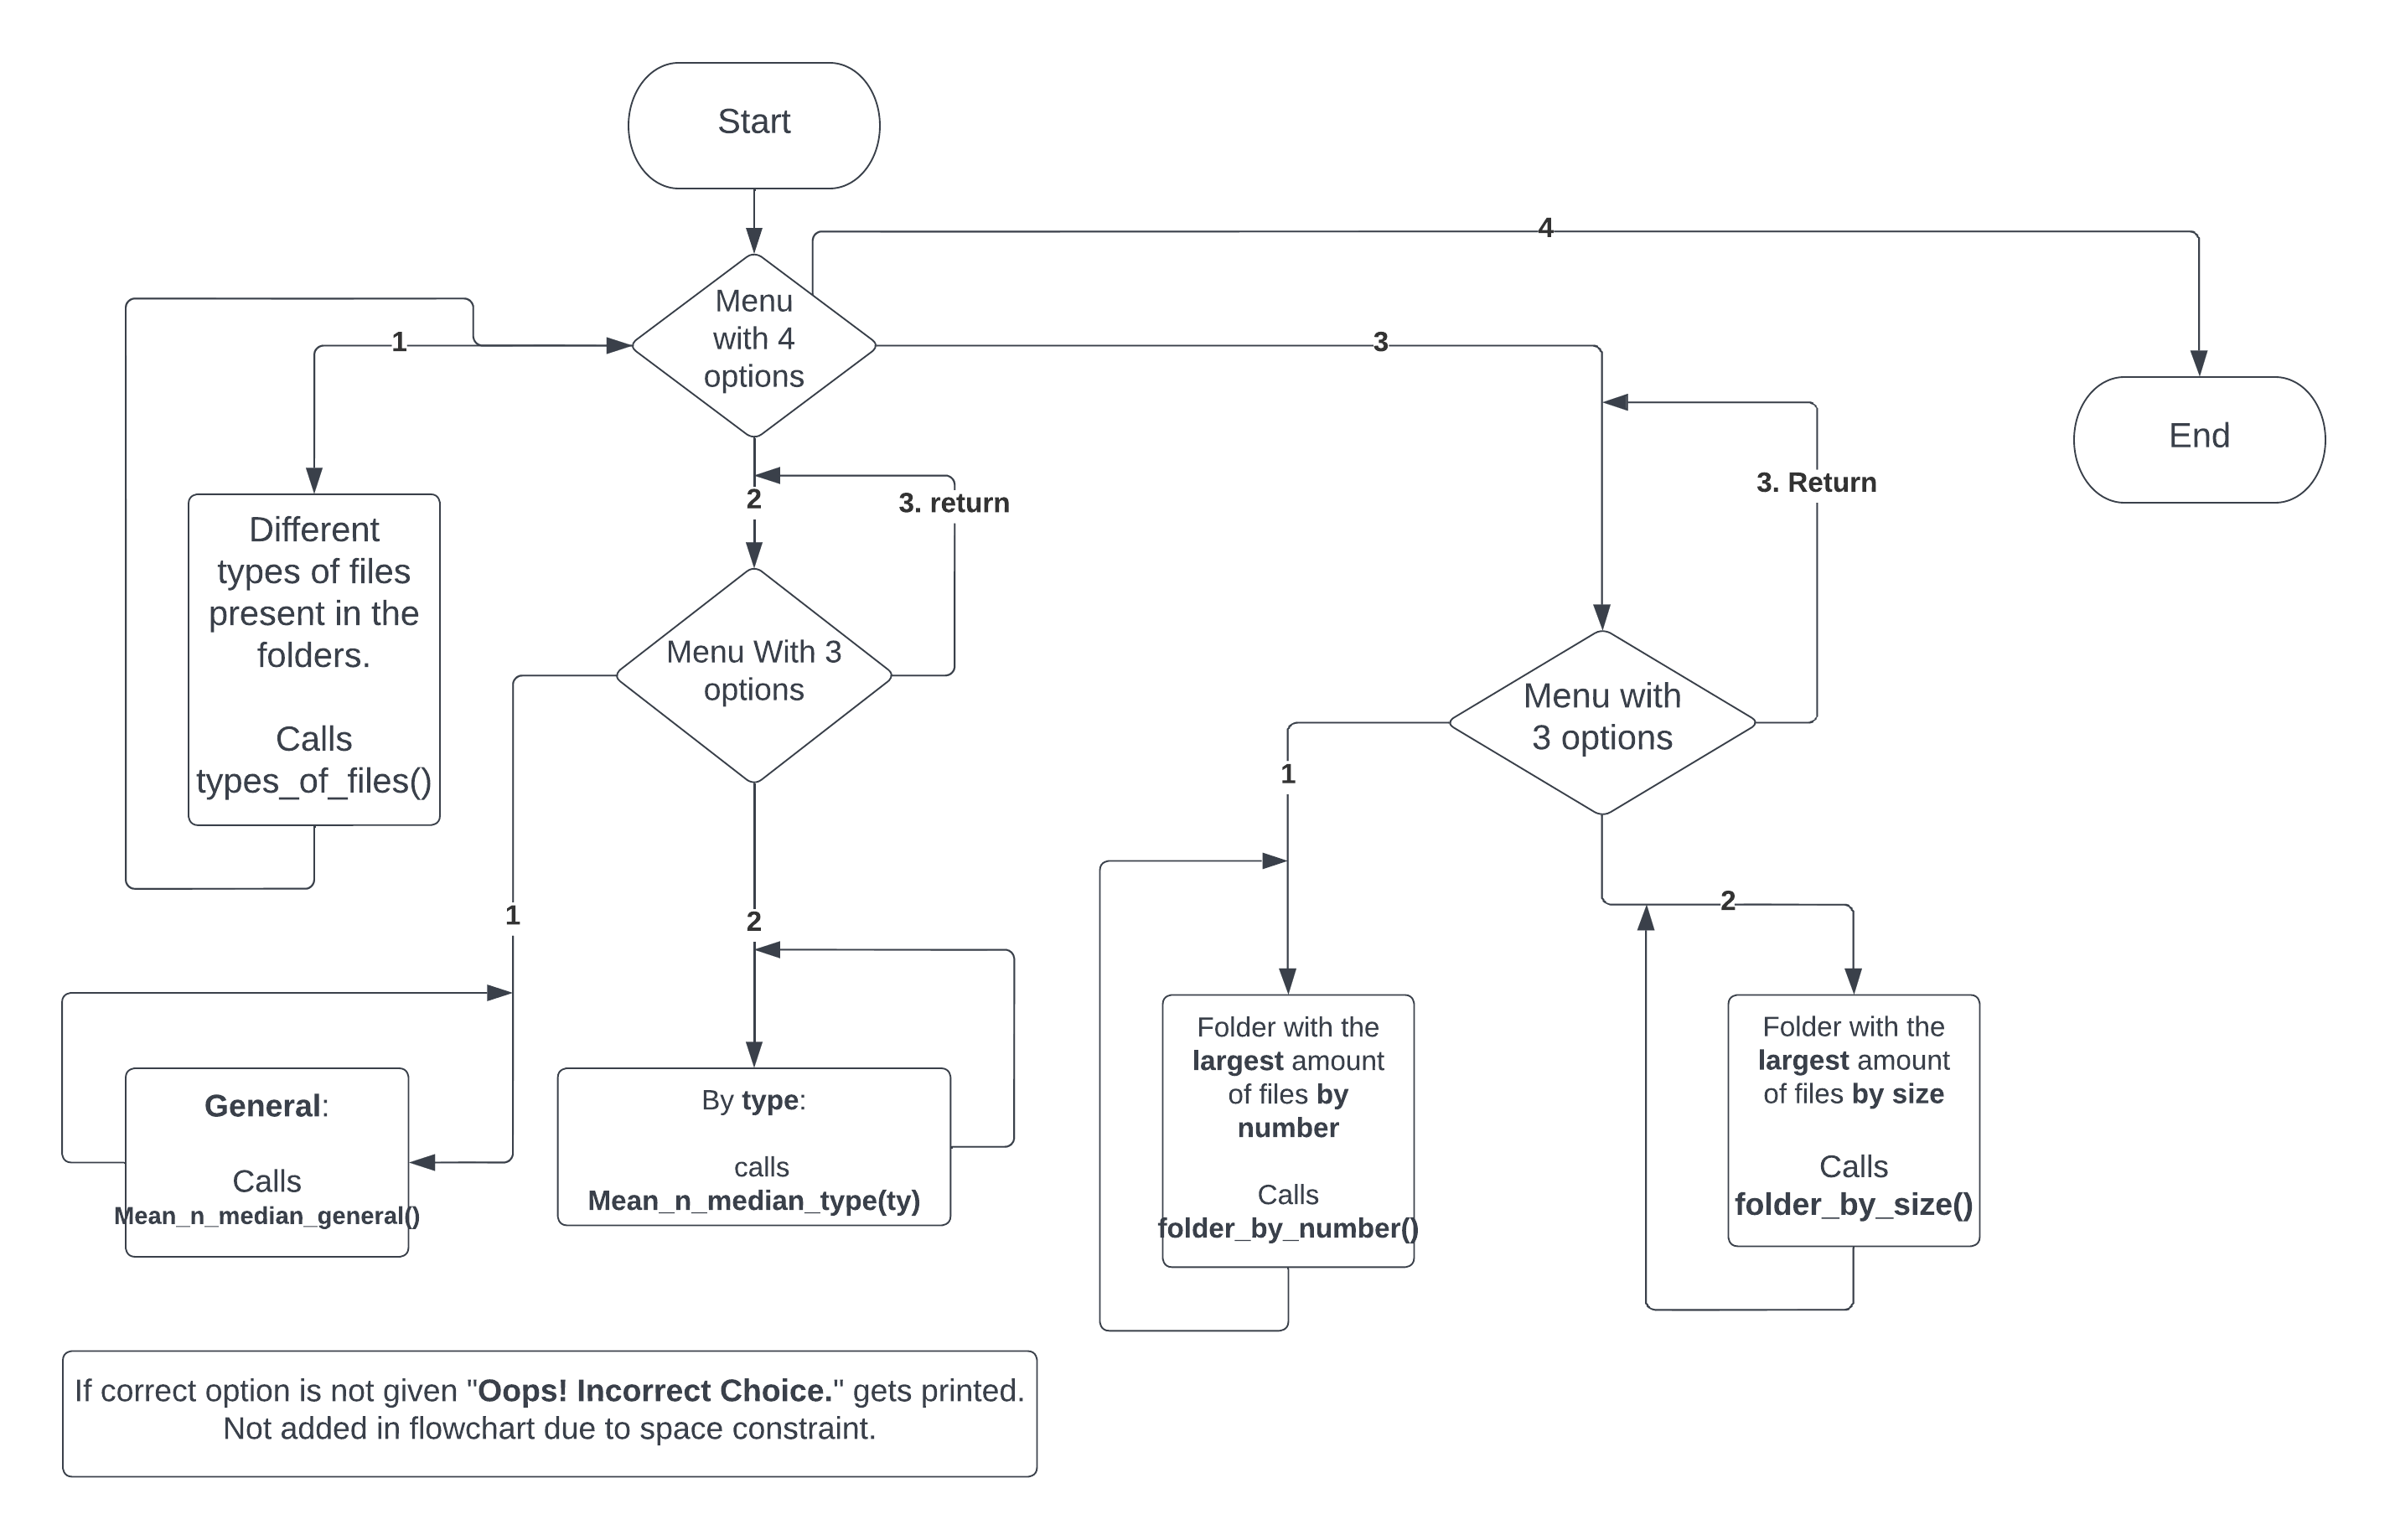


Individual statement is explained in In-line comments.

In [10]:
#Driver code

class Filepro:
    
    '''Calculates all values Extension', 'Size in bytes', 'Hashcode', 'File Name','File Path','Date Modified' 
    and writes/updates into file_info.csv'''
    
    def get_info(self):
        cwd = os.getcwd()                                           #fetching current working date
        data = []                                                   #storing data in 'Extension', 'Size in bytes', 'Hashcode', 'File Name','File Path','Date Modified' order
                                                                    #data is list of lists [[folder1 values from ls list below], [folder2 values from ls list below],...]
        for (dirpath, dirnames, filenames) in walk(cwd):            #Walking through the current path.
            path = dirpath
            for i in range(len(filenames)):                         #looping through all files i.e. filename list
                ls = []                                             #temperory list to store values of each files name,extension,path,hash,size
                if filenames[i] != ".DS_Store":                     #folder DS_Store are filtered.
                    fname,ext = filenames[i].split(".")             #Finding name of folder and extension from name and splitting at'.' delimiter
                    fpath = path+"/"+filenames[i]                   #path contains address till folder. Concatenating "/"+filenames[i] 
                    
                    '''ctime() - translates a time represented in seconds to a string corresponding to local time.
                       getmtime() - To determine when the given path was last modified.'''
                    
                    ftime = time.ctime(os.path.getmtime(fpath)) 
                    fhash = hashcode(fpath)                         #Calling hashcode function with parameter as path
                    fsize = os.path.getsize(fpath)                  #getsize() gets size of file at fpath
                    ls.append(ext)                                  # appending all calculated values to temp list ls
                    ls.append(fsize)
                    ls.append(fhash)
                    ls.append(fname)
                    ls.append(fpath)
                    ls.append(ftime)
                    data.append(ls)                                 #appending this list ls to list data
                    
                                                                    #header is list which represents the header of csv file
        # below code can be optimized by using save report but due to time constraint I am not updating.
        header = ['Extension', 'Size in bytes', 'Hashcode', 'File Name','File Path','Date Modified']
        with open('file_info.csv', 'w', encoding='UTF8', newline='') as f: #opening file_info.csv in write mode
            writer = csv.writer(f)                                  #Return a writer object responsible for converting the user’s data into delimited strings on the given file-like object.
            writer.writerow(header)                                 #Write the row parameter to the writer’s file object
            writer.writerows(data)                                  #Write all elements in rows (an iterable of row objects as described above) to the writer’s file object
            print("done!")                                          #Confirming statement
    
    def __init__(self):
        if os.path.exists("file_info.csv"):                         #exists() function is used to check whether the specified file exists or not
            if version_older_than_2days():                          #Checking if date modified is older than 2 days.
                self.get_info()                                     #If yes then it is updated by calling by get_info() method
        else:
            self.get_info()                                         #If file_info.csv doesn't exist then it is created by calling by get_info() method
      
            
    def generate_report(self):
        if version_older_than_2days():
            self.get_info()
                                                                    #Implementing CLI
        while True:                                                 #Loops till user wants to exit
            print("\nSelect type of report:")  
            print("1. Different types of files present in the folders")  
            print("2. Mean and median size of the files")  
            print("3. Folder name with the largest amount of files")  
            print("4. Exit")
            choice1 = int(input("Enter the Choice:  "))  
            if choice1 == 1:                                        #If users chooses 1st option
                types = types_of_files()                            #Calling types_of_files() function. It returns set of types. Also asks for report in graph view
                for i in types:                                     #Printing the values in the set
                    print("    "+i)
                save_report(["Types"],types)                        #Saving reports to csv file
                    
            elif choice1 == 2:                                      #If users chooses 2nd option
                while True:                                         #Further menu to choose between General or by type
                    print("\nMenu:")  
                    print("1. General")  
                    print("2. By type")  
                    print("3. Return") 
                    choice2 = int(input("Enter the Choice:  ")) 
                    if choice2 == 1:                                #If users chooses 1st option
                        mean,median = Mean_n_median_general()       #This funtion returns two values
                        print("\nMean of size of the files:",mean,"bytes")
                        print("Median of size of the files:",median,"bytes")
                        save_report(["Mean","Median"],[mean,median])#Saving reports to csv file
                    elif choice2 == 2:                              #If users chooses 2nd option
                        print("\nEnter the type from following:")
                        ty = input("json\nipynb\nexe\ntxt\npdf\ncsv") #User chooses type of file
                        mean,median = Mean_n_median_type(ty)        #This funtion returns two values
                        print("\nMean of size of the "+ty+" type: ",mean,"bytes")
                        print("Median of size of the "+ty+" type:",median,"bytes")
                        save_report(["Mean","Median"],[mean,median])#Saving reports to csv file
                    elif choice2 == 3:                              #If users chooses 3rd option
                        break                                       #user wants to return to previous menu
                    else:                                           #If users chooses other option
                        print("Oops! Incorrect Choice.")
                        
            elif choice1 == 3:                                      #If users chooses 3rd option
                while True:                                         #Further menu to choose between by number or by size
                    print("\nMenu:")  
                    print("1. Folder with the largest amount of files by number")  
                    print("2. Folder with the largest amount of files by size")  
                    print("3. Return") 
                    choice2 = int(input("Enter the Choice:  ")) 
                    if choice2 == 1:                                #If users chooses 1st option
                        fname, maxi = folder_by_number()            #returns the Folder with the largest amount of files by number and number too
                        print(fname + "is Folder with the largest amount of files by number - " + str(maxi))
                        save_report(["fname","maxi"],[fname,maxi])  #Saving reports to csv file
                    elif choice2 == 2:                              #If users chooses 2nd option
                        fname, maxi = folder_by_size()              #returns the Folder with the largest amount of files by size and number too
                        print(fname + "is Folder with the largest amount of files by size - " + str(maxi) + "bytes")
                        save_report(["fname","maxi"],[fname,maxi])  #Saving reports to csv file
                    elif choice2 == 3:                              #If users chooses 3rd option
                        break                                       #user wants to return to previous menu
                    else:                                           #If users chooses other option
                        print("Oops! Incorrect Choice.")  
                        
            elif choice1 == 4:                                      #If User wants to exit the software
                break  

            else:                                                   #If users chooses other option
                print("Oops! Incorrect Choice.")


obj = Filepro()                                                     #Object of Filepro class
obj.generate_report()                                               #Calling generate_report() as it acts as UI in the form of CLI



Select type of report:
1. Different types of files present in the folders
2. Mean and median size of the files
3. Folder name with the largest amount of files
4. Exit
Enter the Choice:  3

Menu:
1. Folder with the largest amount of files by number
2. Folder with the largest amount of files by size
3. Return
Enter the Choice:  2
View Pie Chart?
 Press y else n: n
folder1_2_2is Folder with the largest amount of files by size - 56820894bytes
Save reports generated in txt? if yes press yn

Menu:
1. Folder with the largest amount of files by number
2. Folder with the largest amount of files by size
3. Return
Enter the Choice:  3

Select type of report:
1. Different types of files present in the folders
2. Mean and median size of the files
3. Folder name with the largest amount of files
4. Exit
Enter the Choice:  4


__References:__

1. https://numpy.org/doc/
2. https://matplotlib.org/stable/index.html
3. https://pandas.pydata.org/docs/
4. https://docs.python.org/